In [1]:
!ls Data/Glob

f1.txt	f2.txt	f3.txt	f4.txt	f5.txt	f6.txt	f7.txt	f8.txt	f9.txt


In [2]:
filename = "Data/Glob/f1.txt"


In [4]:
import os.path
os.path.exists(filename)

True

In [5]:
!head Data/Glob/f1.txt

# X , Y , E , DX
1
0.00232478,8.22832,0.677097,0.0020133
0.00458718,5.8915,0.193922,0.00192328
0.00684958,12.573,0.413909,0.00189569
0.00911198,37.3161,0.768022,0.00199785
0.0113744,156.672,2.59008,0.00205609
0.0136368,567.555,11.7842,0.00217489
0.0158992,1401.89,16.1017,0.00229348
0.0181616,1334.2,13.4719,0.00239931


In [6]:
# see https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.genfromtxt.html
import numpy as np
data = np.genfromtxt(filename, delimiter=",", skip_header=2, names=['X', 'Y', 'E', 'DX'])
data

array([(0.00232478, 8.22832e+00, 6.77097e-01, 0.0020133 ),
       (0.00458718, 5.89150e+00, 1.93922e-01, 0.00192328),
       (0.00684958, 1.25730e+01, 4.13909e-01, 0.00189569),
       (0.00911198, 3.73161e+01, 7.68022e-01, 0.00199785),
       (0.0113744 , 1.56672e+02, 2.59008e+00, 0.00205609),
       (0.0136368 , 5.67555e+02, 1.17842e+01, 0.00217489),
       (0.0158992 , 1.40189e+03, 1.61017e+01, 0.00229348),
       (0.0181616 , 1.33420e+03, 1.34719e+01, 0.00239931),
       (0.020424  , 1.62173e+03, 2.00042e+01, 0.00247893),
       (0.0226864 , 1.40312e+03, 1.01434e+01, 0.00256543),
       (0.0249488 , 1.30591e+03, 1.03458e+01, 0.00260186),
       (0.0272112 , 7.52002e+02, 6.22791e+00, 0.00263457),
       (0.0294736 , 5.86367e+02, 3.34320e+00, 0.00269503),
       (0.031736  , 4.63746e+02, 2.83678e+00, 0.00273969),
       (0.0339984 , 2.82236e+02, 1.72425e+00, 0.0027873 ),
       (0.0362608 , 2.52291e+02, 1.15568e+00, 0.00285656),
       (0.0385232 , 1.94139e+02, 1.03233e+00, 0.00290755

In [7]:
data['X']

array([0.00232478, 0.00458718, 0.00684958, 0.00911198, 0.0113744 ,
       0.0136368 , 0.0158992 , 0.0181616 , 0.020424  , 0.0226864 ,
       0.0249488 , 0.0272112 , 0.0294736 , 0.031736  , 0.0339984 ,
       0.0362608 , 0.0385232 , 0.0407856 , 0.043048  , 0.0453104 ,
       0.0475728 , 0.0498352 , 0.0520976 , 0.05436   , 0.0566224 ,
       0.0588848 , 0.0611472 , 0.0634096 , 0.065672  , 0.0679344 ,
       0.0701968 , 0.0724592 , 0.0747216 , 0.076984  , 0.0792464 ,
       0.0815088 , 0.0837712 , 0.0860336 , 0.088296  , 0.0905584 ,
       0.0928208 , 0.0950832 , 0.0973456 , 0.099608  , 0.10187   ,
       0.104133  , 0.106395  , 0.108658  , 0.11092   , 0.113182  ,
       0.115445  , 0.117707  , 0.11997   , 0.122232  , 0.124494  ,
       0.126757  , 0.129019  , 0.131282  , 0.133544  , 0.135806  ,
       0.138069  , 0.140331  , 0.142594  , 0.144856  , 0.147118  ,
       0.149381  , 0.151643  , 0.153906  , 0.156168  , 0.15843   ,
       0.160693  , 0.162955  , 0.165218  , 0.16748   , 0.16974

# Ploting

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

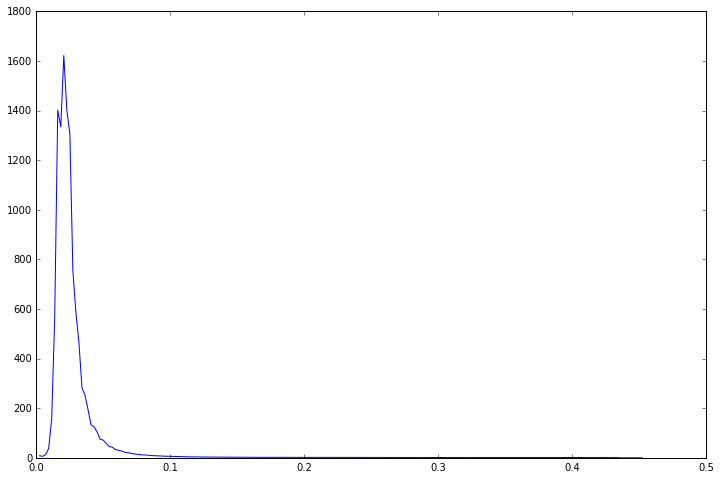

In [16]:
# Simple case
plt.plot(data['X'], data['Y'])

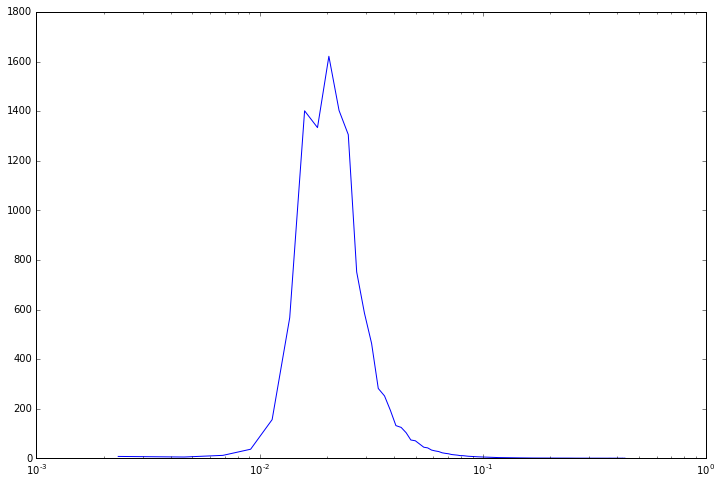

In [17]:
# Log x
plt.semilogx(data['X'], data['Y'])

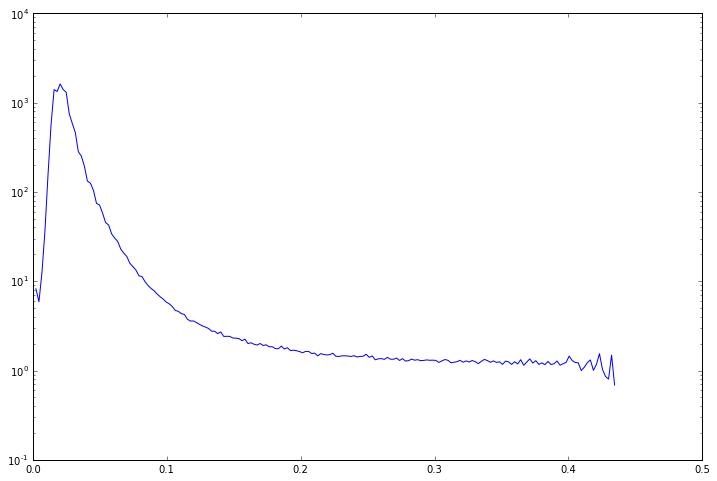

In [18]:
# Log y
plt.semilogy(data['X'], data['Y'])

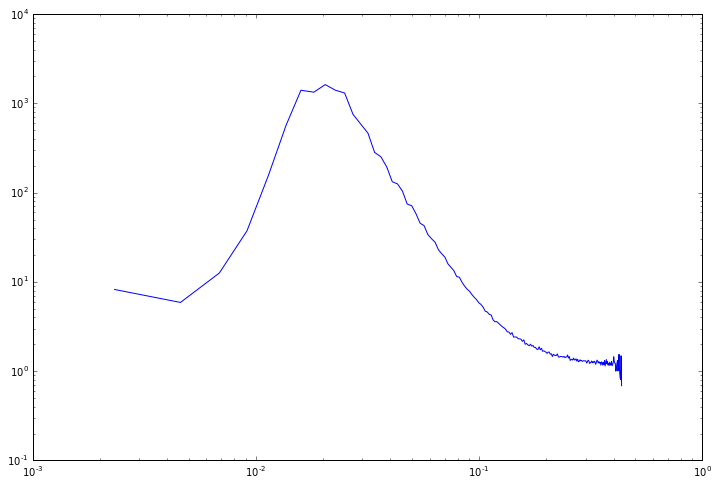

In [19]:
# Log X and Log Y
plt.loglog(data['X'], data['Y'])

<Container object of 3 artists>

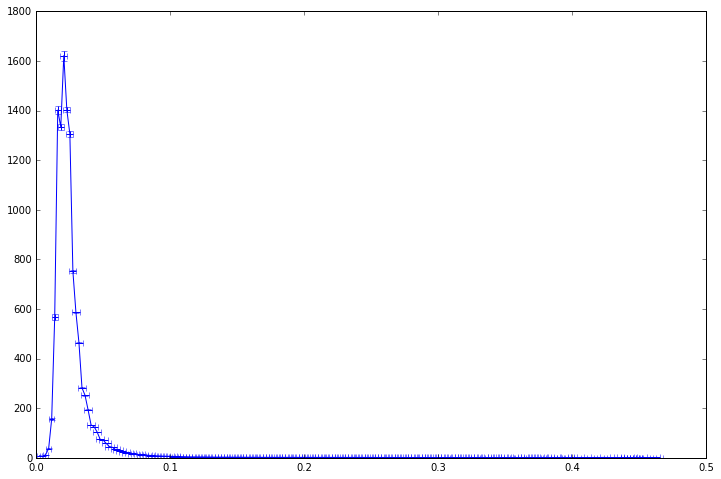

In [20]:
## Error bars linear
plt.errorbar(data['X'], data['Y'], xerr=data['DX'], yerr=data['E'])

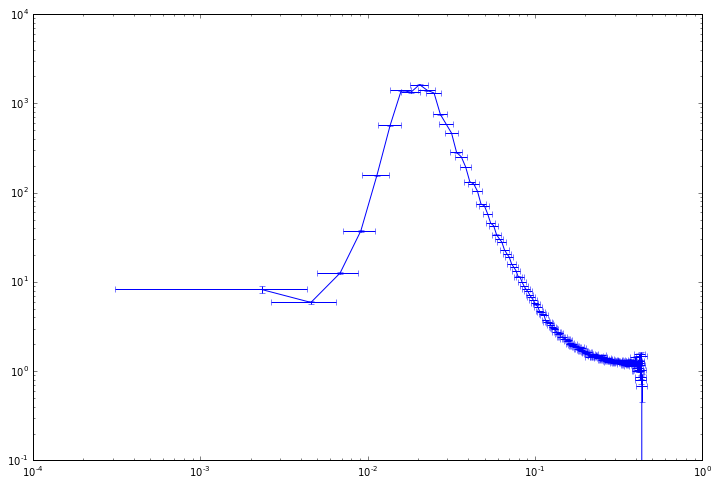

In [21]:
## Error bars Lox Log y
plt.errorbar(data['X'], data['Y'], xerr=data['DX'], yerr=data['E'])

ax = plt.gca()
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')